In [5]:
import numpy as np
from ctapipe.io import event_source
from ctapipe.io import EventSeeker
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20


In [7]:

source = event_source(input_url="/ctadata/franca/LST/LST-1.1.Run00249.0000.fits.fz",max_events=200)

In [9]:
def format_axes(ax):
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(
    axis='x',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    ax.tick_params(
    axis='y',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    
    return ax

3
7
11
15
19
23
27
31
35
39
43
47
51
55
59
63
67
71
75
Event 75, Max: 4095.0 counts


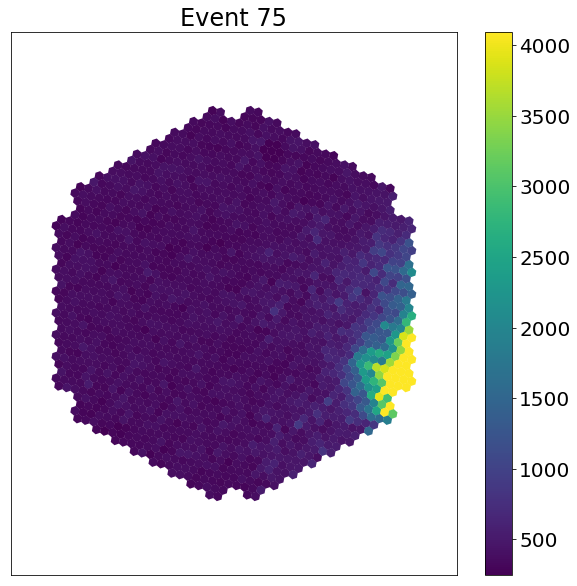

79
83
87
91
95
Event 95, Max: 2804.0 counts


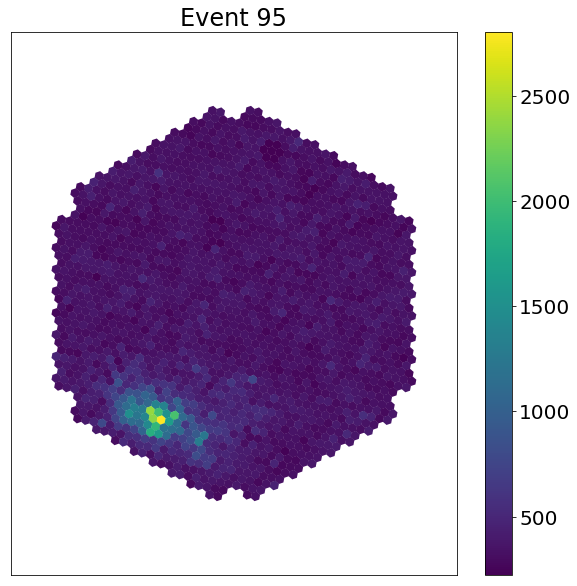

99
103
107
111
115
119
123
127
131
135
139
143
147
151
155
159
163
167
171
175
179
183
187
191
195
199
203
Event 203, Max: 2954.0 counts


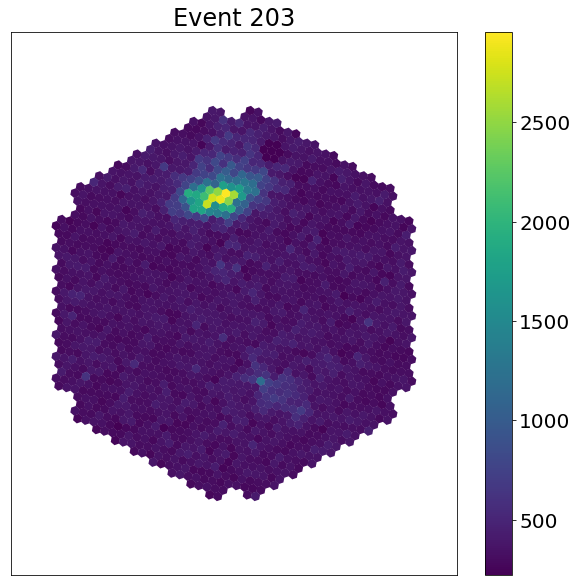

In [10]:
geom = CameraGeometry.from_name("LSTCam-002")
evt_id = 203 # The id of the selected event

for i, ev in enumerate(source):
    N_modules = 7*265
    print(ev.lst.tel[0].evt.event_id)

    #if((ev.lst.tel[0].evt.event_id<19800) or (ev.lst.tel[0].evt.event_id>19860)):
    #    continue

    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.max(ev.r0.tel[0].waveform[0, pixel, 2:38])

    if(np.size(std_signal[std_signal>1000.]) < 15):
        continue  
    print(f"Event {ev.lst.tel[0].evt.event_id}, Max: {np.max(std_signal)} counts")


    #geom = CameraGeometry.from_name("LSTCam-002")
    fig, ax = plt.subplots(figsize=(10,10))

    #disp0 = CameraDisplay(geom, ax=ax)
    disp0 = CameraDisplay(ev.inst.subarray.tels[0].camera, ax=ax)
    disp0.cmap = 'viridis'
    disp0.image = std_signal
    disp0.add_colorbar(ax=ax)

    # Establish max and min
    sort = np.argsort(std_signal)
    min_color = std_signal[sort][7] # There was one cluster off
    max_color = std_signal[sort][-2]
    max_color = np.max(std_signal)

    disp0.set_limits_minmax(min_color, max_color)
    ax.set_title(f"Event {ev.lst.tel[0].evt.event_id}")
    format_axes(ax)
    fig.savefig("Images_LST/Event_%i.png"%(ev.lst.tel[0].evt.event_id))
    #fig.savefig("Images_LST/2018_12_14/Event_%i.png" % (ev.lst.tel[0].evt.event_id))

    plt.show()
    if(ev.lst.tel[0].evt.event_id==evt_id):
        break

cell 1
cell 2
cell 3
cell 4
cell 5
cell 6
cell 7
cell 8
cell 9
cell 10
cell 11
cell 12
cell 13
cell 14
cell 15
cell 16
cell 17
cell 18
cell 19
cell 20
cell 21


/Users/rubenlopez/anaconda/envs/cta-dev/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


cell 22
cell 23
cell 24
cell 25
cell 26
cell 27
cell 28
cell 29
cell 30
cell 31
cell 32
cell 33
cell 34
cell 35
cell 36
cell 37
cell 38


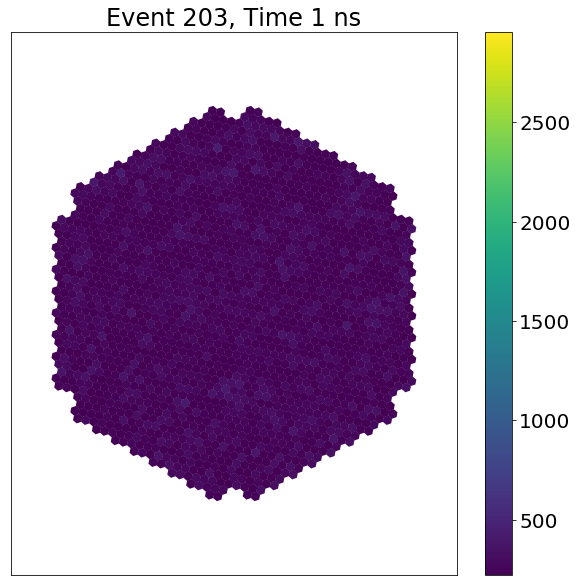

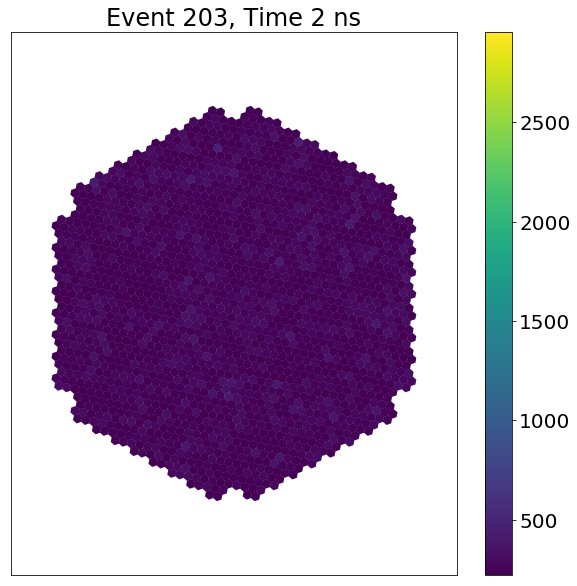

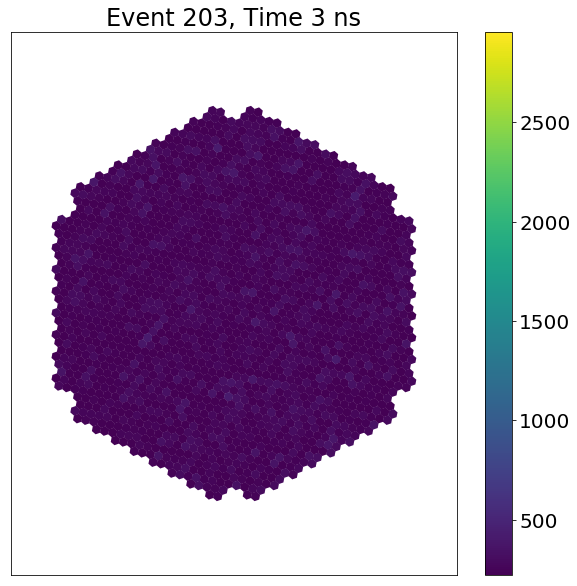

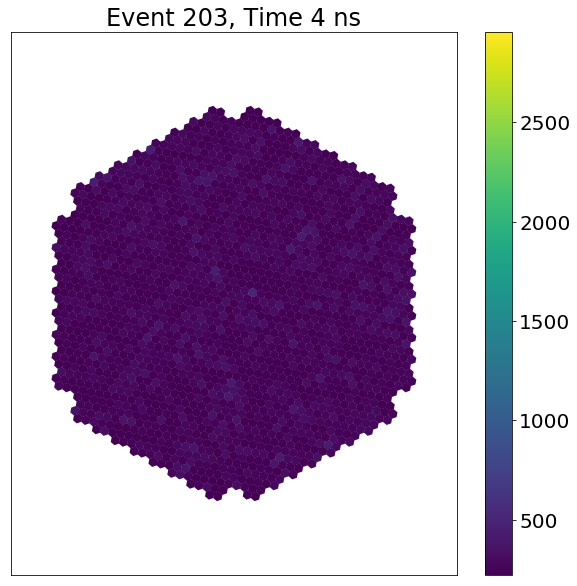

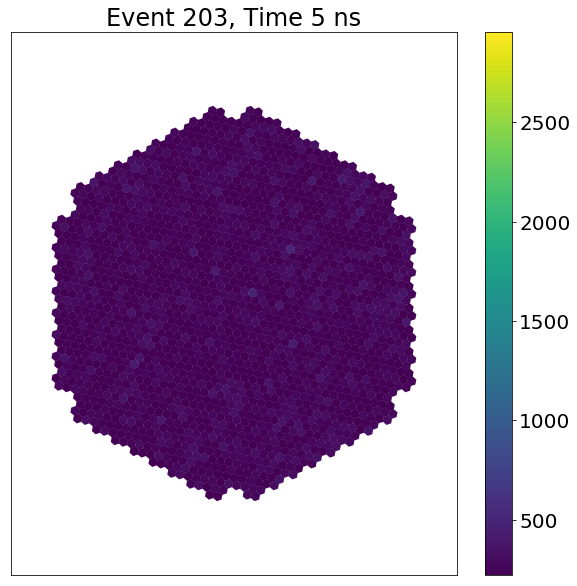

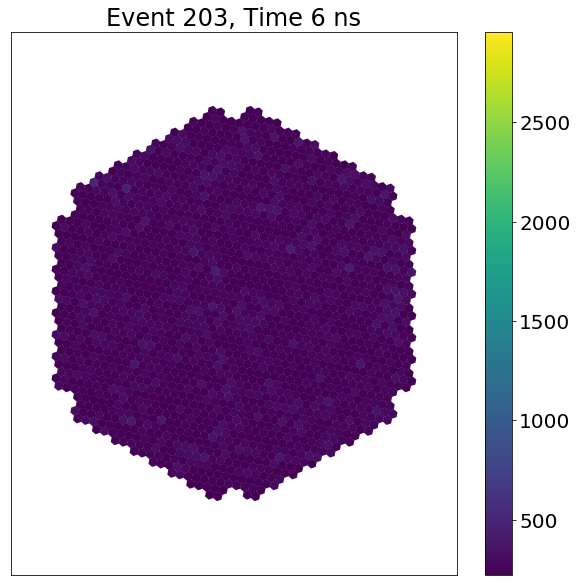

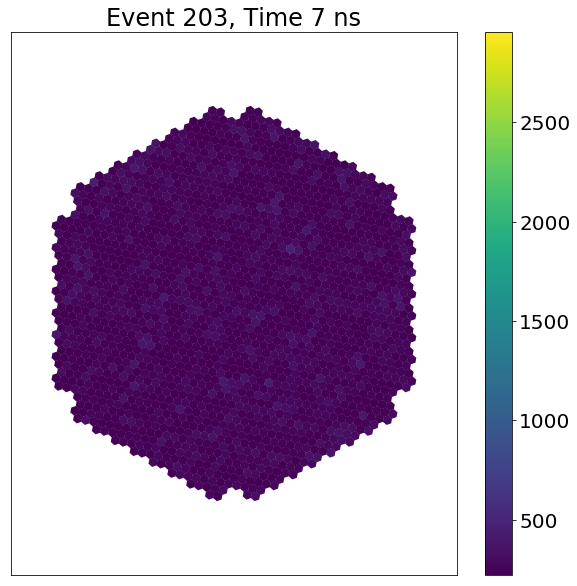

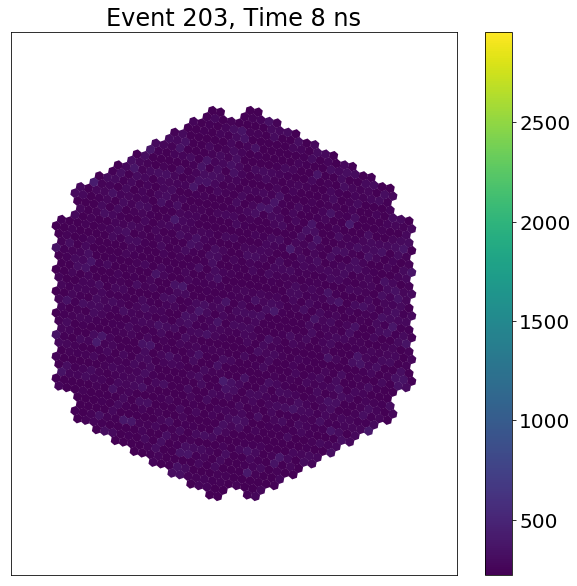

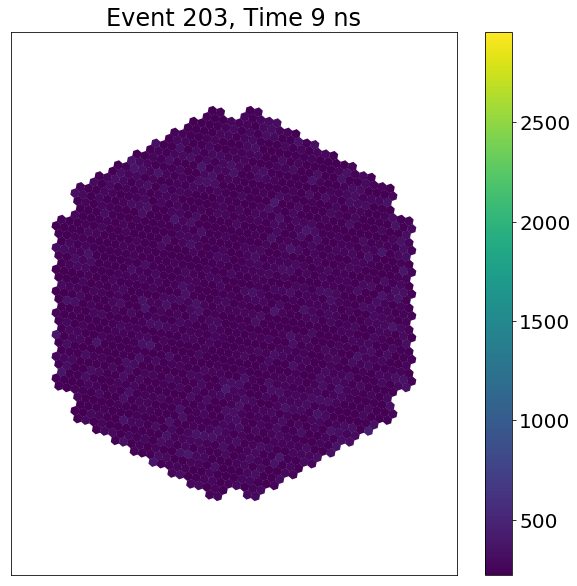

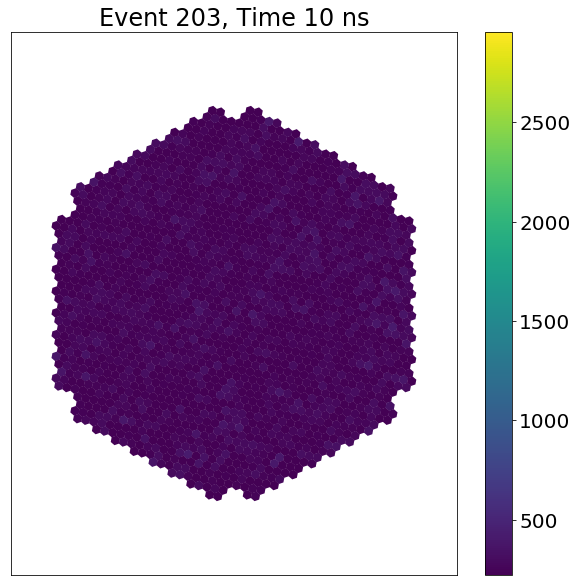

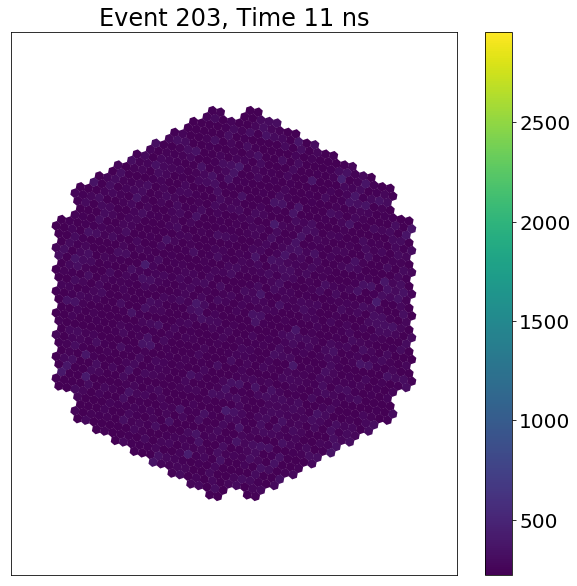

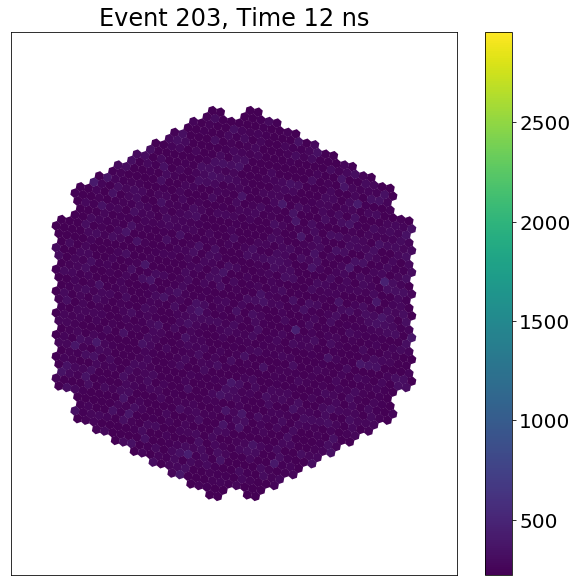

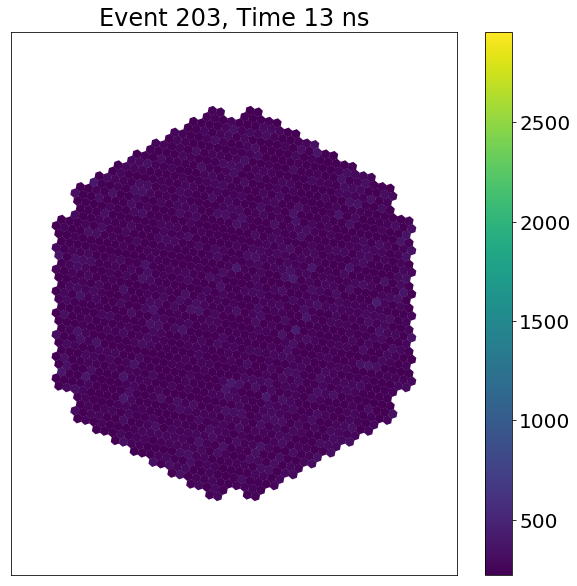

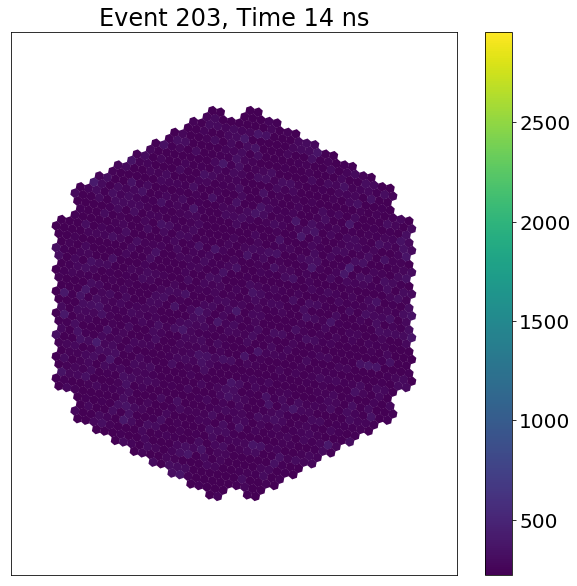

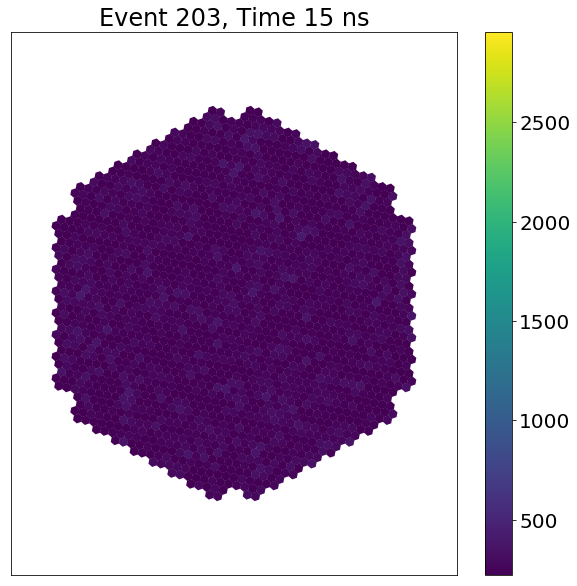

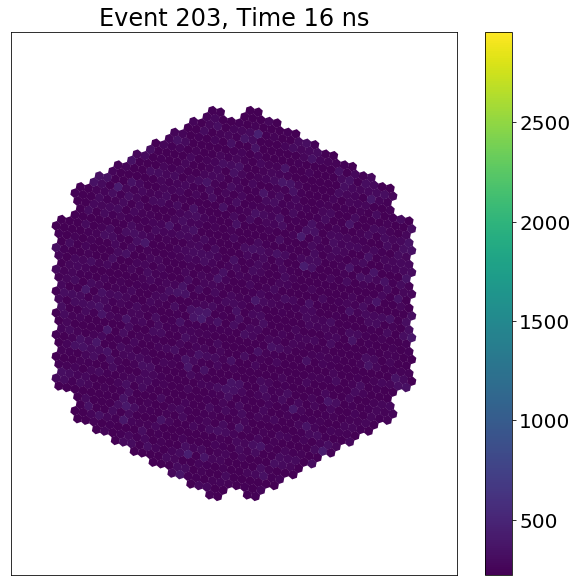

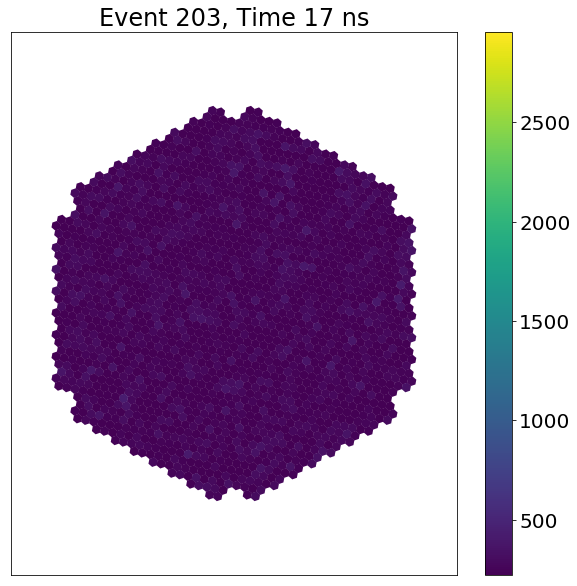

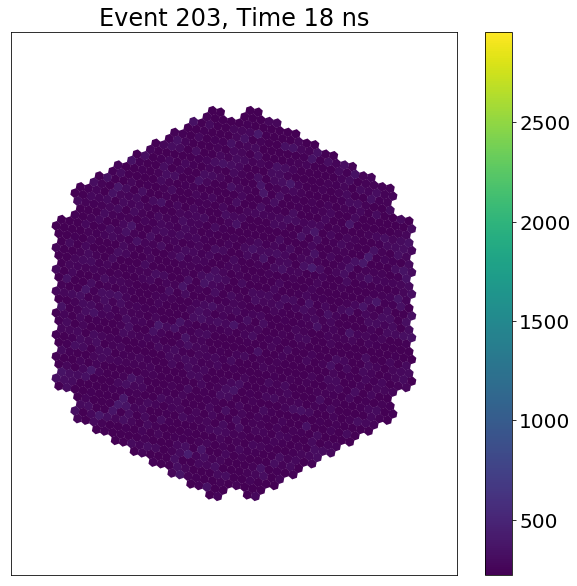

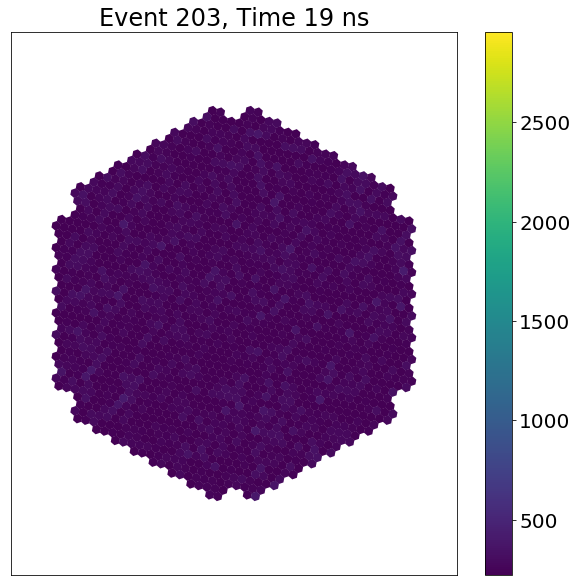

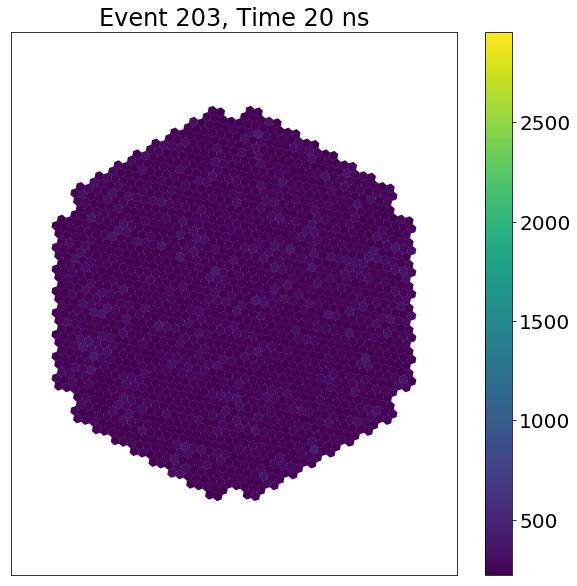

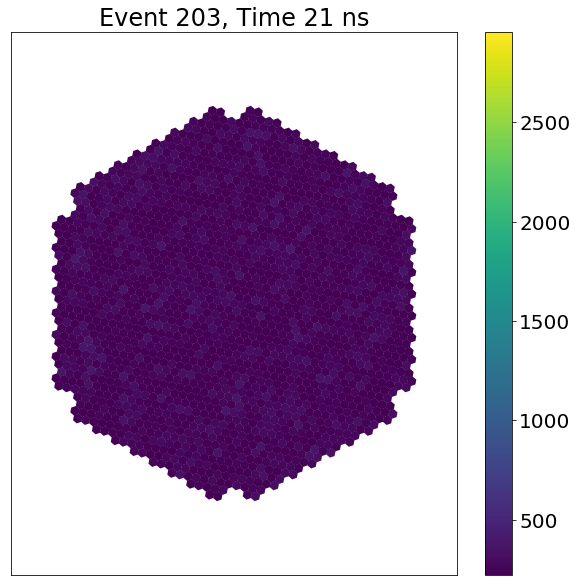

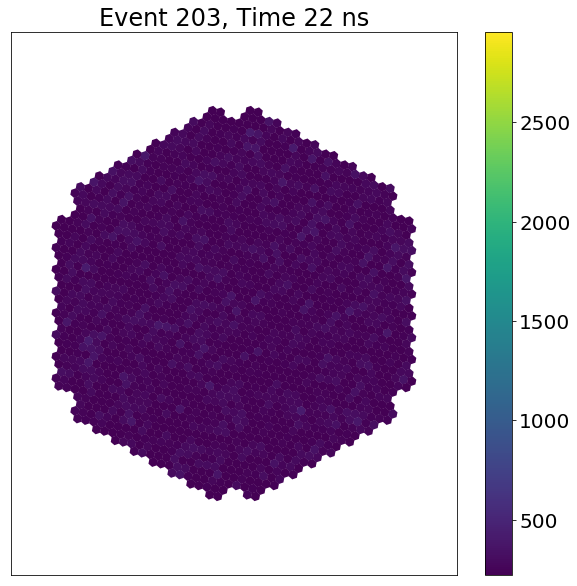

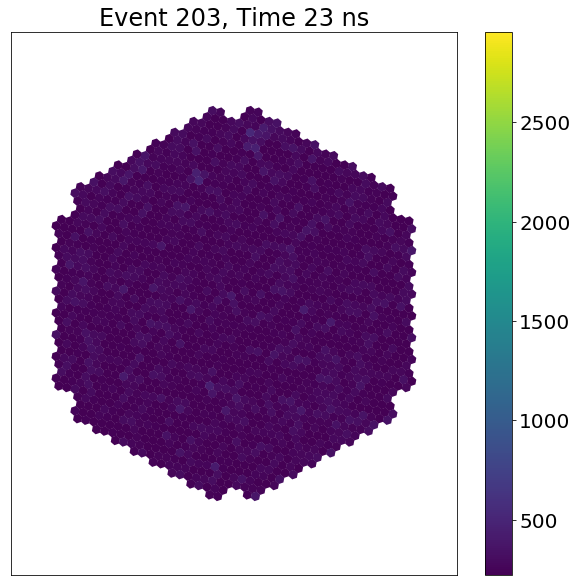

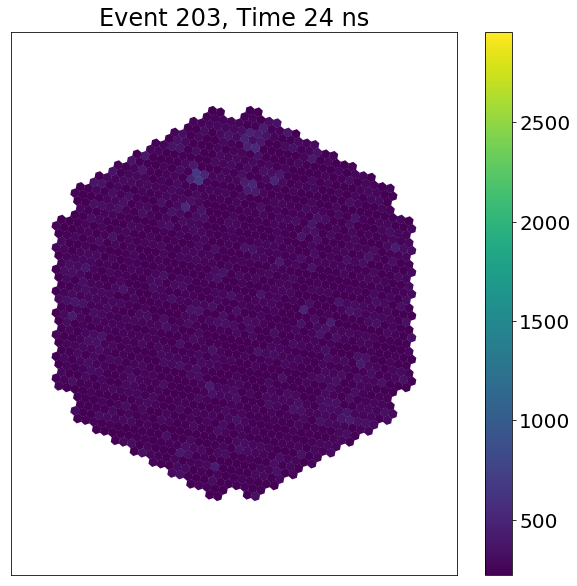

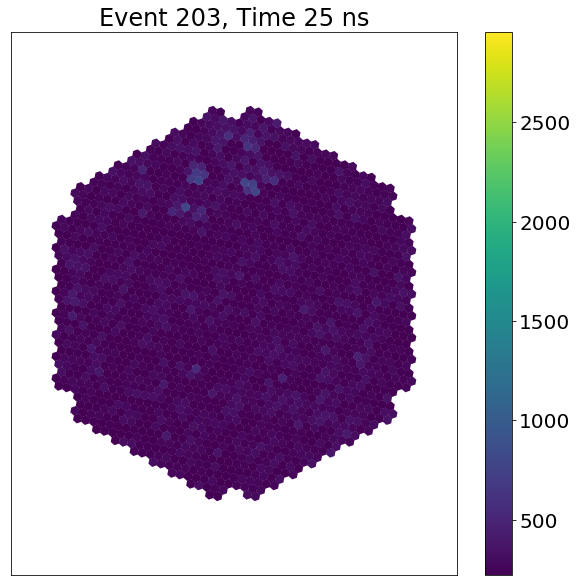

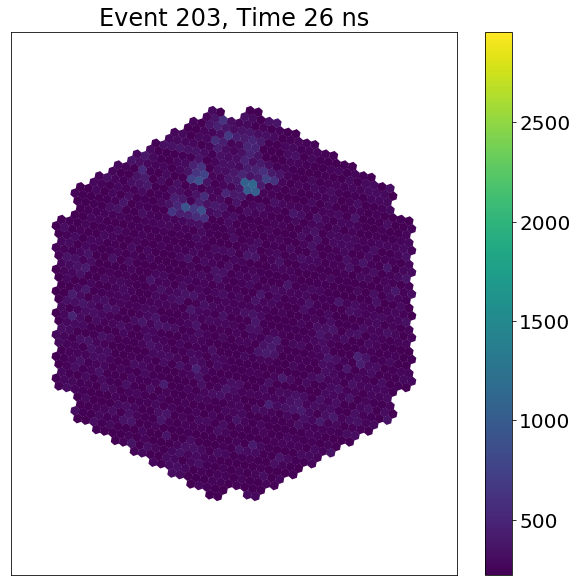

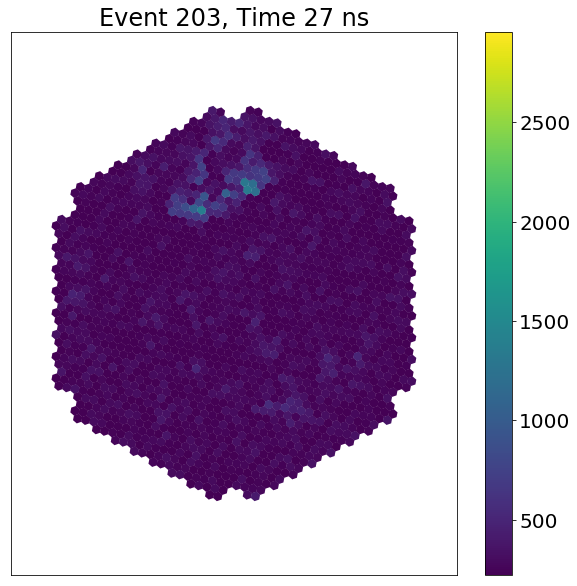

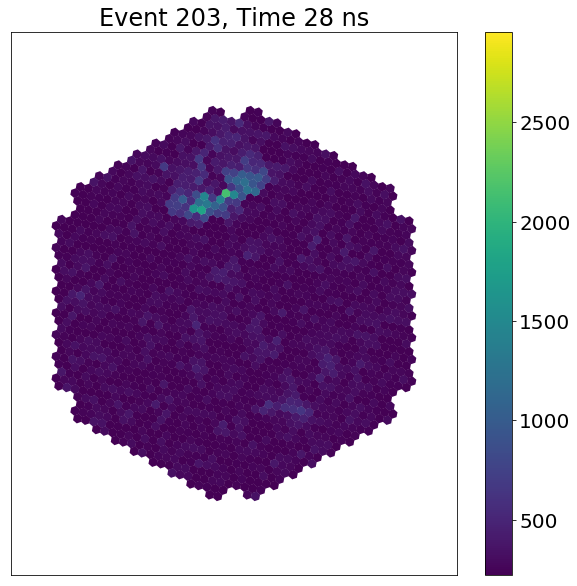

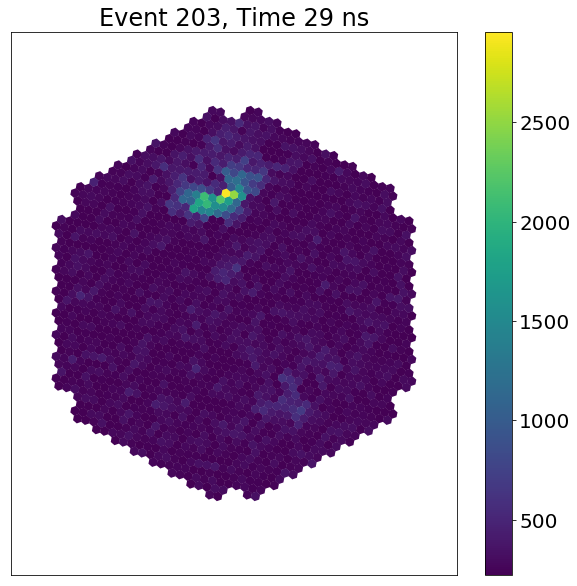

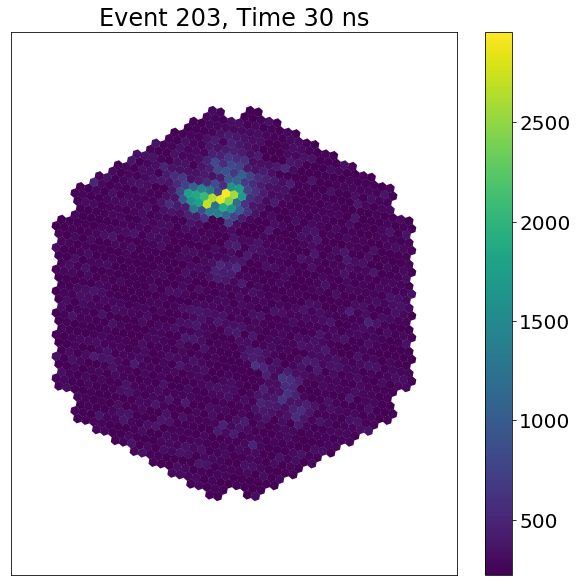

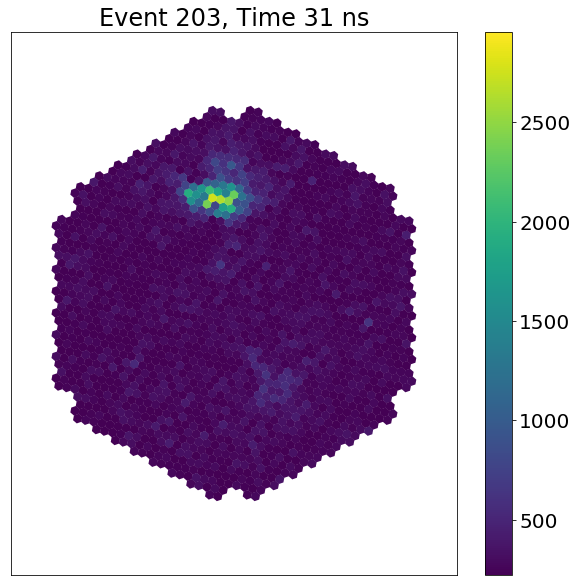

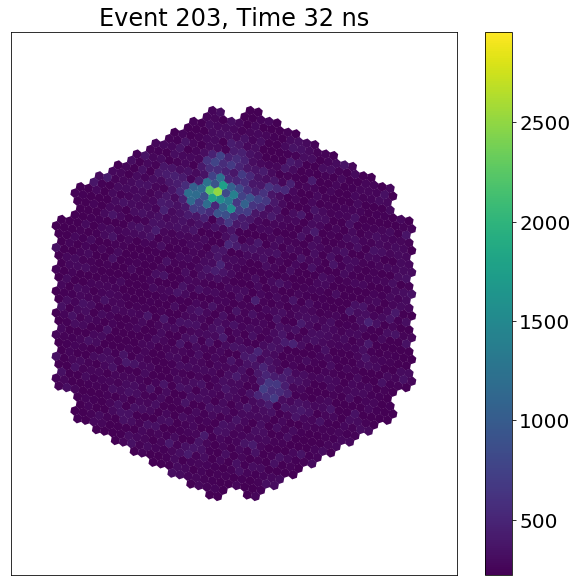

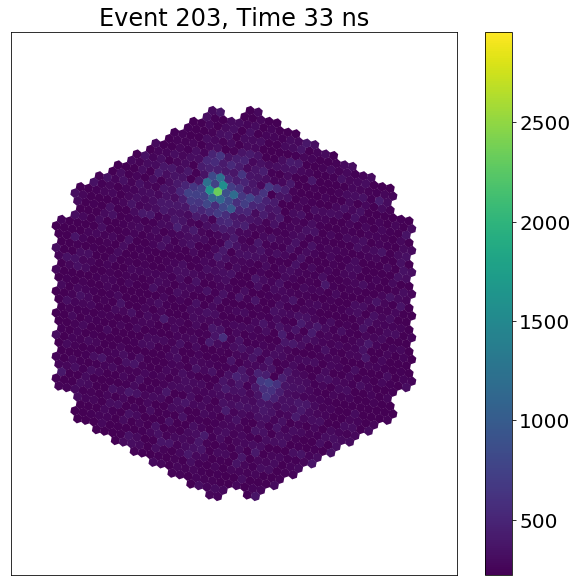

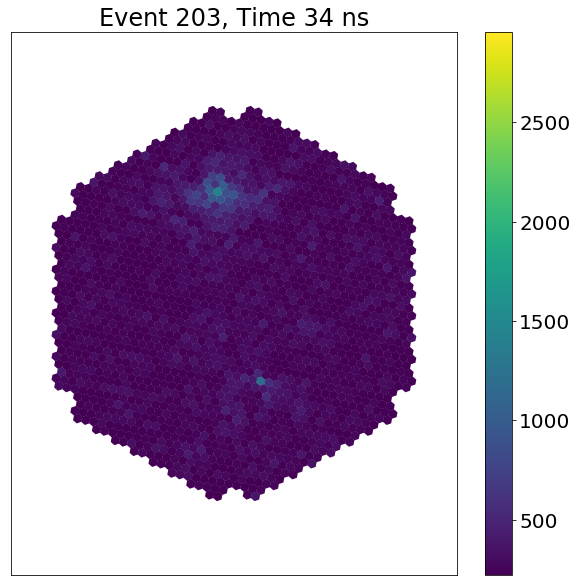

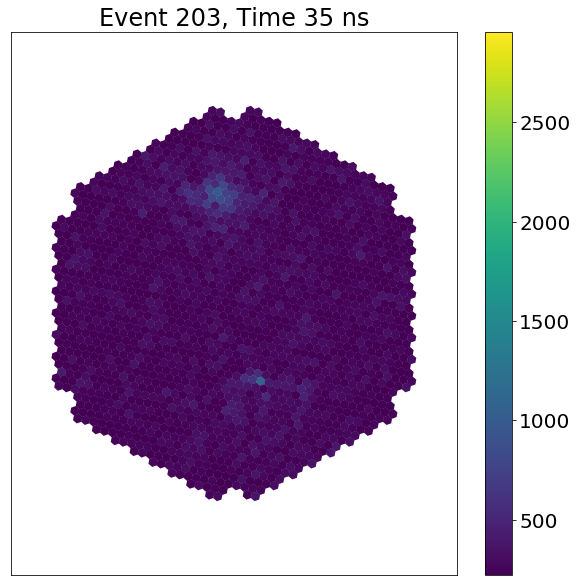

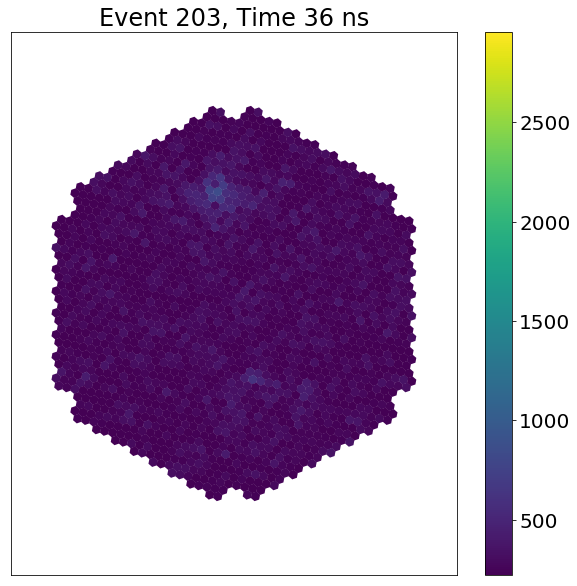

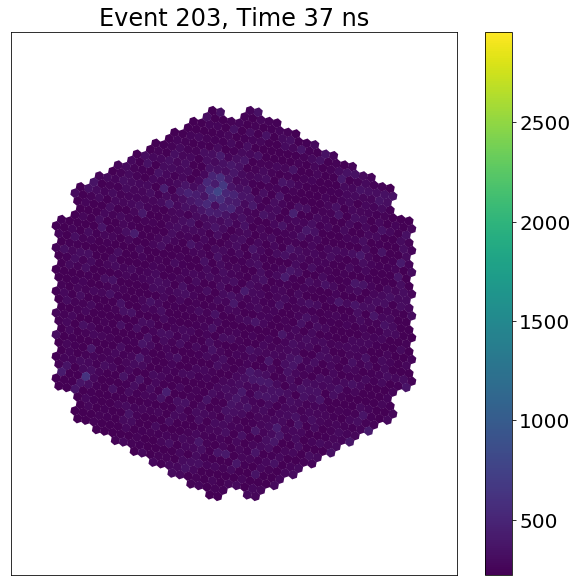

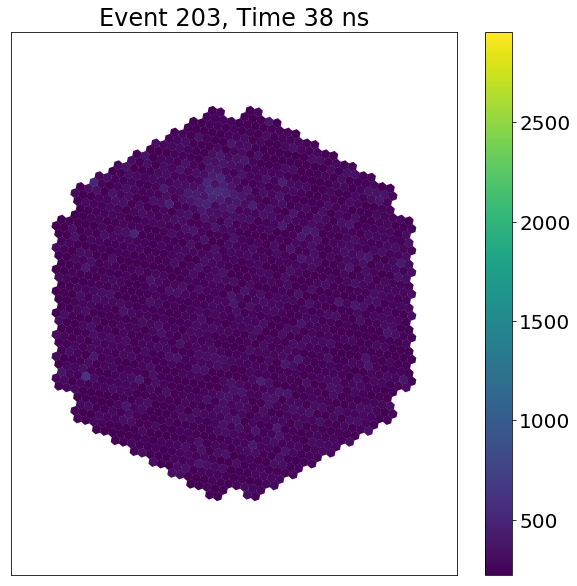

In [11]:
# If you want to make a movie with all the slices

max_color = np.max(std_signal)
sort = np.argsort(std_signal)
min_color = std_signal[sort][7]

for cell in range(1,39):
    print("cell",cell)
    fig, ax = plt.subplots(figsize=(10,10))
    disp0 = CameraDisplay(geom, ax=ax)
    disp0.cmap = 'viridis'
    disp0.add_colorbar(ax=ax)
    disp0.image = ev.r0.tel[0].waveform[0,:,cell]
    disp0.set_limits_minmax(min_color, max_color)
    format_axes(ax)
    ax.set_title(f"Event {ev.lst.tel[0].evt.event_id}, Time {cell} ns")
    fig.savefig("Images_LST/for_gifs/Event_{:02d}_cell{:02d}.png".format(ev.lst.tel[0].evt.event_id,cell))
    #plt.show()